In [21]:
import numpy as np
import os
from package.Graphs import Graphs
import ast
import math

## Analysis for old QubiC Q3 Data (2021) (1 GSPS)

In [ ]:
# Load Data 
state0=np.load('../Data/2021/Q3/state0.npy') #(128,4096,2)
state1=np.load('../Data/2021/Q3/state1.npy') 

# Seperate I and Q
state0_I,state0_Q = state0[:,:,0],state0[:,:,1]  #(128,4096)
state1_I,state1_Q = state1[:,:,0],state1[:,:,1]


# Mean across shots
shotsMean0_I,shotsMean0_Q = np.mean(state0_I,axis=0),np.mean(state0_Q,axis=0) #(4096)
shotsMean1_I,shotsMean1_Q = np.mean(state1_I,axis=0),np.mean(state1_Q,axis=0)

In [ ]:
# Call Ploting function on Orignial Signal
window=100 #For Moving Average
fig=Graphs.plotSignals(shotsMean0_I,shotsMean0_Q,shotsMean1_I,shotsMean1_Q,lo=0,hi=4096,window_size=window)
fig.show()

In [ ]:
# Get and plot Readout Frequency
frequency,amplitude,phase=Graphs.getFFT(shotsMean0_Q,1000000000)
index = np.where(amplitude==np.max(amplitude))[0]
if phase[index]>=0:
    sign='+'
else:
    sign='-'
print(sign,frequency[index][0],"Hz")
fig=Graphs.plotFFT(frequency,amplitude)
fig.show()

In [ ]:
#Rotate the Orignal signal with signal of readout frequency

# Construct rotating signal
readout_freq=17597366.299644876
rot=Graphs.getComplexSignal(readout_freq,0,4096,1)  #(4096)

#Rotate og signal and convert the into complex signals
state0_complex=(state0_I+1j*state0_Q)*rot  #(128,4096)
state1_complex=(state1_I+1j*state1_Q)*rot

# Mean Across complex shots
shotsmean0_complex=np.mean(state0_complex,axis=0) #(4096)
shotsmean1_complex=np.mean(state1_complex,axis=0)


shotsStd0_I=np.std(state0_complex.real,axis=0)/100 #(4096)
shotsStd1_I=np.std(state1_complex.real,axis=0)/100 
shotsStd0_Q=np.std(state0_complex.imag,axis=0)/100
shotsStd1_Q=np.std(state1_complex.imag,axis=0)/100

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = state0_complex[:,1500].real.reshape((128))  # Replace with your own data
print(shotsmean0_complex[1500])
# Create a histogram
plt.hist(data, bins=20, edgecolor='k', alpha=0.7)  # 'bins' sets the number of bins

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

In [ ]:
# Smooth out complex signal and get I and Q component from complex signal
smooth0_I,smooth0_Q,smooth1_I,smooth1_Q=Graphs.ewmaComplexSignals(shotsmean0_complex , shotsmean1_complex, alpha=100)  #(4096)

# Smooth out standard Deviation of I and Q component.
smoothStd0_I,smoothStd0_Q,smoothStd1_I,smoothStd1_Q=Graphs.ewmaSignals(shotsStd0_I,shotsStd0_Q,shotsStd1_I,shotsStd1_Q, alpha=100)
# # Plot trajectory
fig=Graphs.plotTrajectoryError(smooth0_I,smooth0_Q,
                               smooth1_I,smooth1_Q,
                               smoothStd0_I,smoothStd0_Q,
                               smoothStd1_I,smoothStd1_Q,
                               1000,2700,50) #700ns proper trajectory seperation
fig.show()

fig=Graphs.plotTrajectory(smooth0_I,smooth0_Q,
                          smooth1_I,smooth1_Q,
                          1000,2700,50) #700ns proper trajectory seperation
fig.show()

In [ ]:
# Integration across time for each shots
st,en=100,2500   #Best result 1200ns to 2500ns but result from 1200ns to 1500ns is comparable too.
sum0_complex=np.mean(state0_complex[:,st:en],axis=1) #(128)
sum1_complex=np.mean(state1_complex[:,st:en],axis=1) 
# Plot cluster
fig=Graphs.plotCluster(sum0_complex.real,sum0_complex.imag,sum1_complex.real,sum1_complex.imag)
fig.show()

In [ ]:
# Weighted integration across time for each shots
st,en=100,2500
weight_I=np.transpose(abs(smooth0_I-smooth1_I))
weight_Q=np.transpose(abs(smooth0_Q-smooth1_Q))
print(weight_I.shape)
weightedSum0_I=np.mean(np.real(state0_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum0_Q=np.mean(np.imag(state0_complex[:,st:en])*weight_Q[st:en],axis=1)
weightedSum1_I=np.mean(np.real(state1_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum1_Q=np.mean(np.imag(state1_complex[:,st:en])*weight_Q[st:en],axis=1)

fig=Graphs.plotCluster(weightedSum0_I,weightedSum0_Q,weightedSum1_I,weightedSum1_Q)
fig.show()

## Analysis for new QubiC Data (2023) (2 GSPS)

In [60]:
# Load Data 
# state0=np.load('../Data/hd_data/test_decimator0_state0/arr_0.npy')[:,:8192] #(1000,8192)
# state1=np.load('../Data/hd_data/test_decimator0_state1/arr_0.npy')[:,:8192]

#Load Neel's Data
state0=np.load('../Data/neel_readout/Q1_2us/state0.npy')[:,:8192]
state1=np.load('../Data/neel_readout/Q1_2us/state1.npy')[:,:8192]

# state0=np.load('../Data/state0.npy')[:,:8192]
# state1=np.load('../Data/state1.npy')[:,:8192]

# Mean across shots
shotsMean0= np.mean(state0,axis=0) #(8192)
shotsMean1= np.mean(state1,axis=0)


fig=Graphs.plotSignal(shotsMean0[10:],lo=10,hi=8192,step=0.5)
fig.show()

fig=Graphs.plotSignal(shotsMean1[10:],lo=10,hi=8192,step=0.5)
fig.show()

In [32]:
# Get and plot Readout Frequency
frequency,amplitude,phase=Graphs.getFFT(shotsMean0[10:],2000000000) #Try slicing out first 10ns
index = np.where(amplitude==np.max(amplitude))[0]
if phase[index]>=0:
    sign='+'
else:
    sign='-'
print(sign,frequency[index][0],"Hz")
fig=Graphs.plotFFT(frequency,amplitude)
fig.show()

+ 558543143.4857002 Hz


/global/homes/n/nrvora/.conda/envs/readout/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [61]:
#Rotate the Orignal signal with signal of readout frequency

# Construct rotating signal
# Q1 6558500000.003296
# q0 6554298629.445268
readout_freq=6558500000.003296
dlo=Graphs.getComplexSignal(readout_freq,0,4096,0.5) #(8192)


#Rotate og signal and convert the into complex signals
state0_complex=((state0+0j)*dlo) #(1000,8192)
state1_complex=((state1+0j)*dlo)

# fig=Graphs.plotSignals(np.mean(state0_complex[:,10:],axis=0).real,np.mean(state1_complex[:,10:],axis=0).real,np.mean(state0_complex[:,10:],axis=0).imag,np.mean(state1_complex[:,10:],axis=0).imag,0,4096,100,0.5)
# fig.show()

fig=Graphs.plotSignal(state0_complex[1,700:3700].imag,lo=0,hi=3000,step=0.5)
fig.show()

state0_save=np.stack((state0_complex.real,state0_complex.imag),axis=2)
state1_save=np.stack((state1_complex.real,state1_complex.imag),axis=2)
np.save('../Data/new/2gsps/state0.npy',state0_save)
np.save('../Data/new/2gsps/state1.npy',state1_save)
# Mean Across complex shots
shotsmean0_complex=np.mean(state0_complex,axis=0) #(8192)
shotsmean1_complex=np.mean(state1_complex,axis=0)

shotsStd0_I=np.std(state0_complex[3:].real,axis=0) #(8192)
shotsStd1_I=np.std(state1_complex[3:].real,axis=0)
shotsStd0_Q=np.std(state0_complex[3:].imag,axis=0)
shotsStd1_Q=np.std(state1_complex[3:].imag,axis=0)

# np.set_printoptions(threshold=np.inf)
# shotsStd0_I

(6000, 8192)
(6000,)
(-8.41181240464591-1.332299958776547j)


Text(0.5, 1.0, 'Histogram')

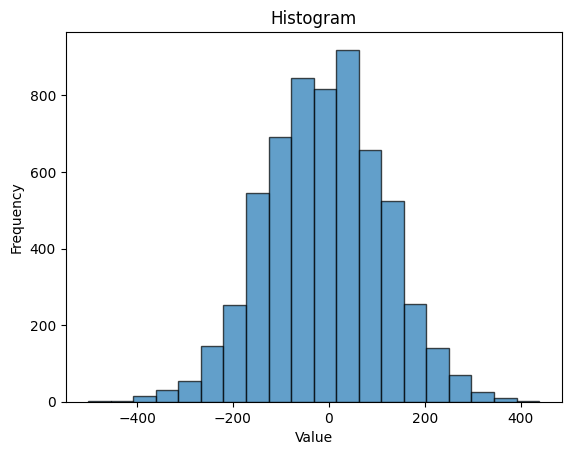

In [52]:
import matplotlib.pyplot as plt
import numpy as np

print(state0_complex.shape)
data = state0_complex[:,2700].real.reshape((6000)) 
print(data.shape)
print(shotsmean0_complex[2700])
# Create a histogram
plt.hist(data, bins=20, edgecolor='k', alpha=0.7)  # 'bins' sets the number of bins

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

In [62]:
# Smooth out complex signal and get I and Q component from complex signal
smooth0_I,smooth0_Q,smooth1_I,smooth1_Q=Graphs.ewmaComplexSignals(shotsmean0_complex[3:] , shotsmean1_complex[3:], alpha=100)  #(8189)
# Smooth out standard Deviation of I and Q component.
smoothStd0_I,smoothStd0_Q,smoothStd1_I,smoothStd1_Q=Graphs.ewmaSignals(shotsStd0_I,shotsStd0_Q,shotsStd1_I,shotsStd1_Q, alpha=100)
# # Plot trajectory
# fig=Graphs.plotTrajectoryError(smooth0_I,smooth0_Q,
#                                smooth1_I,smooth1_Q,
#                                smoothStd0_I,smoothStd0_Q,
#                                smoothStd1_I,smoothStd1_Q,
#                                700,2700,50) #700ns proper trajectory seperation
# fig.show()

fig=Graphs.plotTrajectory(smooth0_I,smooth0_Q,
                          smooth1_I,smooth1_Q,
                          700,2700,50) #700ns proper trajectory seperation
fig.show()

In [63]:
# Integration across time for each shots
st,en=700,4700  #clear seperation from 2000 to 3000 ie. 1µs to 1.5µs
sum0_complex=np.mean(state0_complex[:,st:en],axis=1) #(1000)
sum1_complex=np.mean(state1_complex[:,st:en],axis=1) 
# Plot cluster
fig=Graphs.plotCluster(sum0_complex.real,sum0_complex.imag,sum1_complex.real,sum1_complex.imag)
fig.show()

centroid0=sum0_complex.mean()
centroid1=sum1_complex.mean()

### Remove outliers

In [64]:
# Find error point
l0_1=[]
l1_0=[]
print(sum0_complex.shape[0])
for i in range(sum0_complex.shape[0]):
    point=np.array([sum0_complex[i].real,sum0_complex[i].imag])
    point0=np.array([centroid0.real,centroid0.imag])
    point1=np.array([centroid1.real,centroid1.imag])
    dist0 = math.dist(point , point0)
    dist1 = math.dist(point , point1)
    if (dist0+0)<dist1:
        # l0_1.append(sum0_complex[i])
        l0_1.append(i)
for i in range(sum1_complex.shape[0]):
    point=np.array([sum1_complex[i].real,sum1_complex[i].imag])
    point0=np.array([centroid0.real,centroid0.imag])
    point1=np.array([centroid1.real,centroid1.imag])
    dist0 = math.dist(point , point0)
    dist1 = math.dist(point , point1)
    if dist0>(dist1+0):
        # l1_0.append(sum1_complex[i])
        l1_0.append(i)
print(len(l0_1),len(l1_0))

1000
967 948


In [65]:
state0_herhalded,state1_herhalded=[],[]
for i in l0_1:
    state0_herhalded.append(state0_complex[i])
for i in l1_0:
    state1_herhalded.append(state1_complex[i])
state0_herhalded=np.array(state0_herhalded)
state1_herhalded=np.array(state1_herhalded)
print(state0_herhalded.shape,state1_herhalded.shape)


state0_save=np.stack((state0_herhalded.real,state0_herhalded.imag),axis=2)
state1_save=np.stack((state1_herhalded.real,state1_herhalded.imag),axis=2)
np.save('../Data/new/2gsps/Q0state0_her.npy',state0_save)
np.save('../Data/new/2gsps/Q0state1_her.npy',state1_save)

(967, 8192) (948, 8192)


In [66]:
# Integration across time for each shots
st,en=700,3700  #clear seperation from 2000 to 3000 ie. 1µs to 1.5µs
sum0_complex=np.mean(state0_herhalded[:,st:en],axis=1) #(1000)
sum1_complex=np.mean(state1_herhalded[:,st:en],axis=1) 
# Plot cluster
fig=Graphs.plotCluster(sum0_complex.real,sum0_complex.imag,sum1_complex.real,sum1_complex.imag)
fig.show()

centroid0=sum0_complex.mean()
centroid1=sum1_complex.mean()

## Analysis of old QubiC data Q1 (2021) (1 GSPS)

In [ ]:
# Load Data 
state0=np.load('../Data/2021/Q1/state0.npy') #(128,4096,2)
state1=np.load('../Data/2021/Q1/state1.npy') 

# Seperate I and Q
state0_I,state0_Q = state0[:,:,0],state0[:,:,1]  #(128,4096)
state1_I,state1_Q = state1[:,:,0],state1[:,:,1]


# Mean across shots
shotsMean0_I,shotsMean0_Q = np.mean(state0_I,axis=0),np.mean(state0_Q,axis=0) #(4096)
shotsMean1_I,shotsMean1_Q = np.mean(state1_I,axis=0),np.mean(state1_Q,axis=0)

In [ ]:
# Call Ploting function on Orignial Signal
window=100 #For Moving Average
fig=Graphs.plotSignals(shotsMean0_I,shotsMean0_Q,shotsMean1_I,shotsMean1_Q,lo=0,hi=4096,window_size=window)
fig.show()

In [ ]:
# Get and plot Readout Frequency
frequency,amplitude,phase=Graphs.getFFT(shotsMean0_Q,1000000000)
index = np.where(amplitude==np.max(amplitude))[0]
if phase[index]>=0:
    sign='+'
else:
    sign='-'
print(sign,frequency[index][0],"Hz")
fig=Graphs.plotFFT(frequency,amplitude)
fig.show()

In [ ]:
#Rotate the Orignal signal with signal of readout frequency

# Construct rotating signal
readout_freq= -92529296.87499999
rot=Graphs.getComplexSignal(readout_freq,0,4096,1)  #(4096)

#Rotate og signal and convert the into complex signals
state0_complex=(state0_I+1j*state0_Q)*rot  #(128,4096)
state1_complex=(state1_I+1j*state1_Q)*rot

# Mean Across complex shots
shotsmean0_complex=np.mean(state0_complex,axis=0) #(4096)
shotsmean1_complex=np.mean(state1_complex,axis=0)


shotsStd0_I=np.std(state0_complex.real,axis=0)/128 #(4096)
shotsStd1_I=np.std(state1_complex.real,axis=0)/128 
shotsStd0_Q=np.std(state0_complex.imag,axis=0)/128
shotsStd1_Q=np.std(state1_complex.imag,axis=0)/128

In [ ]:
# Smooth out complex signal and get I and Q component from complex signal
smooth0_I,smooth0_Q,smooth1_I,smooth1_Q=Graphs.ewmaComplexSignals(shotsmean0_complex , shotsmean1_complex, alpha=100)  #(4096)

# Smooth out standard Deviation of I and Q component.
smoothStd0_I,smoothStd0_Q,smoothStd1_I,smoothStd1_Q=Graphs.ewmaSignals(shotsStd0_I,shotsStd0_Q,shotsStd1_I,shotsStd1_Q, alpha=100)
# # Plot trajectory
# fig=Graphs.plotTrajectoryError(smooth0_I,smooth0_Q,
#                                smooth1_I,smooth1_Q,
#                                smoothStd0_I,smoothStd0_Q,
#                                smoothStd1_I,smoothStd1_Q,
#                                700,2000,50) #700ns proper trajectory seperation
# fig.show()

fig=Graphs.plotTrajectory(smooth0_I,smooth0_Q,
                          smooth1_I,smooth1_Q,
                          700,2700,50) #700ns proper trajectory seperation
fig.show()

In [ ]:
# Integration across time for each shots
st,en=1000,1500   #Best result 1200ns to 2500ns but result from 1200ns to 1500ns is comparable too.
sum0_complex=np.mean(state0_complex[:,st:en],axis=1) #(128)
sum1_complex=np.mean(state1_complex[:,st:en],axis=1) 
# Plot cluster
fig=Graphs.plotCluster(sum0_complex.real,sum0_complex.imag,sum1_complex.real,sum1_complex.imag)
fig.show()

In [ ]:
# Weighted integration across time for each shots
st,en=1000,1500
weight_I=np.transpose(abs(smooth0_I-smooth1_I))
weight_Q=np.transpose(abs(smooth0_Q-smooth1_Q))
print(weight_I.shape)
weightedSum0_I=np.mean(np.real(state0_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum0_Q=np.mean(np.imag(state0_complex[:,st:en])*weight_Q[st:en],axis=1)
weightedSum1_I=np.mean(np.real(state1_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum1_Q=np.mean(np.imag(state1_complex[:,st:en])*weight_Q[st:en],axis=1)

fig=Graphs.plotCluster(weightedSum0_I,weightedSum0_Q,weightedSum1_I,weightedSum1_Q)
fig.show()

# Analysis of old QubiC data Q2 (2021) (1 GSPS)

In [ ]:
# Load Data 
state0=np.load('../Data/2021/Q2/state0.npy') #(128,4096,2)
state1=np.load('../Data/2021/Q2/state1.npy') 

# Seperate I and Q
state0_I,state0_Q = state0[:,:,0],state0[:,:,1]  #(128,4096)
state1_I,state1_Q = state1[:,:,0],state1[:,:,1]


# Mean across shots
shotsMean0_I,shotsMean0_Q = np.mean(state0_I,axis=0),np.mean(state0_Q,axis=0) #(4096)
shotsMean1_I,shotsMean1_Q = np.mean(state1_I,axis=0),np.mean(state1_Q,axis=0)

In [ ]:
# Call Ploting function on Orignial Signal
window=100 #For Moving Average
fig=Graphs.plotSignals(shotsMean0_I,shotsMean0_Q,shotsMean1_I,shotsMean1_Q,lo=0,hi=4096,window_size=window)
fig.show()

In [ ]:
# Get and plot Readout Frequency
frequency,amplitude,phase=Graphs.getFFT(shotsMean0_Q,1000000000)
index = np.where(amplitude==np.max(amplitude))[0]
if phase[index]>0:
    sign='+'
else:
    sign='-'
print(sign,frequency[index][0],"Hz")
fig=Graphs.plotFFT(frequency,amplitude)
fig.show()

In [ ]:
#Rotate the Orignal signal with signal of readout frequency

# Construct rotating signal
readout_freq= -36073223.594996214   # FFT shows + 35644531.24999999 Hz
rot=Graphs.getComplexSignal(readout_freq,0,4096,1)  #(4096)

#Rotate og signal and convert the into complex signals
state0_complex=(state0_I+1j*state0_Q)*rot  #(128,4096)
state1_complex=(state1_I+1j*state1_Q)*rot

# Mean Across complex shots
shotsmean0_complex=np.mean(state0_complex,axis=0) #(4096)
shotsmean1_complex=np.mean(state1_complex,axis=0)


shotsStd0_I=np.std(state0_complex.real,axis=0)/128 #(4096)
shotsStd1_I=np.std(state1_complex.real,axis=0)/128 
shotsStd0_Q=np.std(state0_complex.imag,axis=0)/128
shotsStd1_Q=np.std(state1_complex.imag,axis=0)/128

In [ ]:
# Smooth out complex signal and get I and Q component from complex signal
smooth0_I,smooth0_Q,smooth1_I,smooth1_Q=Graphs.ewmaComplexSignals(shotsmean0_complex , shotsmean1_complex, alpha=100)  #(4096)

# Smooth out standard Deviation of I and Q component.
smoothStd0_I,smoothStd0_Q,smoothStd1_I,smoothStd1_Q=Graphs.ewmaSignals(shotsStd0_I,shotsStd0_Q,shotsStd1_I,shotsStd1_Q, alpha=100)
# # Plot trajectory
# fig=Graphs.plotTrajectoryError(smooth0_I,smooth0_Q,
#                                smooth1_I,smooth1_Q,
#                                smoothStd0_I,smoothStd0_Q,
#                                smoothStd1_I,smoothStd1_Q,
#                                700,2000,50) #700ns proper trajectory seperation
# fig.show()

fig=Graphs.plotTrajectory(smooth0_I,smooth0_Q,
                          smooth1_I,smooth1_Q,
                          700,2500,50) #700ns proper trajectory seperation
fig.show()

In [ ]:
# Weighted integration across time for each shots
st,en=1000,1500
weight_I=np.transpose(abs(smooth0_I-smooth1_I))
weight_Q=np.transpose(abs(smooth0_Q-smooth1_Q))
print(weight_I.shape)
weightedSum0_I=np.mean(np.real(state0_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum0_Q=np.mean(np.imag(state0_complex[:,st:en])*weight_Q[st:en],axis=1)
weightedSum1_I=np.mean(np.real(state1_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum1_Q=np.mean(np.imag(state1_complex[:,st:en])*weight_Q[st:en],axis=1)

fig=Graphs.plotCluster(weightedSum0_I,weightedSum0_Q,weightedSum1_I,weightedSum1_Q)
fig.show()

# Analysis of old QubiC data Q5 (2021) (1 GSPS)

In [ ]:
# Load Data 
state0=np.load('../Data/2021/Q5/state0.npy') #(128,4096,2)
state1=np.load('../Data/2021/Q5/state1.npy') 

# Seperate I and Q
state0_I,state0_Q = state0[:,:,0],state0[:,:,1]  #(128,4096)
state1_I,state1_Q = state1[:,:,0],state1[:,:,1]


# Mean across shots
shotsMean0_I,shotsMean0_Q = np.mean(state0_I,axis=0),np.mean(state0_Q,axis=0) #(4096)
shotsMean1_I,shotsMean1_Q = np.mean(state1_I,axis=0),np.mean(state1_Q,axis=0)

In [ ]:
# Call Ploting function on Orignial Signal
window=100 #For Moving Average
fig=Graphs.plotSignals(shotsMean0_I,shotsMean0_Q,shotsMean1_I,shotsMean1_Q,lo=0,hi=4096,window_size=window)
fig.show()

In [ ]:
# Get and plot Readout Frequency
frequency,amplitude,phase=Graphs.getFFT(shotsMean0_Q,1000000000)
index = np.where(amplitude==np.max(amplitude))[0]
if phase[index]>0:
    sign='+'
else:
    sign='-'
print(sign,frequency[index][0],"Hz")
fig=Graphs.plotFFT(frequency,amplitude)
fig.show()

In [ ]:
#Rotate the Orignal signal with signal of readout frequency

# Construct rotating signal
readout_freq= + 130638987.08604848   # FFT shows  -130615234.37499999 Hz
rot=Graphs.getComplexSignal(readout_freq,0,4096,1)  #(4096)

#Rotate og signal and convert the into complex signals
state0_complex=(state0_I+1j*state0_Q)*rot  #(128,4096)
state1_complex=(state1_I+1j*state1_Q)*rot

# Mean Across complex shots
shotsmean0_complex=np.mean(state0_complex,axis=0) #(4096)
shotsmean1_complex=np.mean(state1_complex,axis=0)


shotsStd0_I=np.std(state0_complex.real,axis=0)/128 #(4096)
shotsStd1_I=np.std(state1_complex.real,axis=0)/128 
shotsStd0_Q=np.std(state0_complex.imag,axis=0)/128
shotsStd1_Q=np.std(state1_complex.imag,axis=0)/128

In [ ]:
# Smooth out complex signal and get I and Q component from complex signal
smooth0_I,smooth0_Q,smooth1_I,smooth1_Q=Graphs.ewmaComplexSignals(shotsmean0_complex , shotsmean1_complex, alpha=100)  #(4096)

# Smooth out standard Deviation of I and Q component.
smoothStd0_I,smoothStd0_Q,smoothStd1_I,smoothStd1_Q=Graphs.ewmaSignals(shotsStd0_I,shotsStd0_Q,shotsStd1_I,shotsStd1_Q, alpha=100)
# # Plot trajectory
# fig=Graphs.plotTrajectoryError(smooth0_I,smooth0_Q,
#                                smooth1_I,smooth1_Q,
#                                smoothStd0_I,smoothStd0_Q,
#                                smoothStd1_I,smoothStd1_Q,
#                                700,2000,50) #700ns proper trajectory seperation
# fig.show()

fig=Graphs.plotTrajectory(smooth0_I,smooth0_Q,
                          smooth1_I,smooth1_Q,
                          700,2500,50) #700ns proper trajectory seperation
fig.show()

In [ ]:
# Weighted integration across time for each shots
st,en=1000,1500
weight_I=np.transpose(abs(smooth0_I-smooth1_I))
weight_Q=np.transpose(abs(smooth0_Q-smooth1_Q))
print(weight_I.shape)
weightedSum0_I=np.mean(np.real(state0_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum0_Q=np.mean(np.imag(state0_complex[:,st:en])*weight_Q[st:en],axis=1)
weightedSum1_I=np.mean(np.real(state1_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum1_Q=np.mean(np.imag(state1_complex[:,st:en])*weight_Q[st:en],axis=1)

fig=Graphs.plotCluster(weightedSum0_I,weightedSum0_Q,weightedSum1_I,weightedSum1_Q)
fig.show()

# Analysis of old QubiC data Q6 (2021) (1 GSPS)

In [ ]:
# Load Data 
state0=np.load('../Data/2021/Q6/state0.npy') #(128,4096,2)
state1=np.load('../Data/2021/Q6/state1.npy') 

# Seperate I and Q
state0_I,state0_Q = state0[:,:,0],state0[:,:,1]  #(128,4096)
state1_I,state1_Q = state1[:,:,0],state1[:,:,1]


# Mean across shots
shotsMean0_I,shotsMean0_Q = np.mean(state0_I,axis=0),np.mean(state0_Q,axis=0) #(4096)
shotsMean1_I,shotsMean1_Q = np.mean(state1_I,axis=0),np.mean(state1_Q,axis=0)

In [ ]:
# Call Ploting function on Orignial Signal
window=100 #For Moving Average
fig=Graphs.plotSignals(shotsMean0_I,shotsMean0_Q,shotsMean1_I,shotsMean1_Q,lo=0,hi=4096,window_size=window)
fig.show()

In [ ]:
# Get and plot Readout Frequency
frequency,amplitude,phase=Graphs.getFFT(shotsMean0_Q,1000000000)
index = np.where(amplitude==np.max(amplitude))[0]
if phase[index]>=0:
    sign='+'
else:
    sign='-'
print(sign,frequency[index][0],"Hz")
fig=Graphs.plotFFT(frequency,amplitude)
fig.show()

In [ ]:
#Rotate the Orignal signal with signal of readout frequency

# Construct rotating signal
readout_freq= + 191121796.06750062   # FFT shows  -190917968.74999997 Hz
rot=Graphs.getComplexSignal(readout_freq,0,4096,1)  #(4096)

#Rotate og signal and convert the into complex signals
state0_complex=(state0_I+1j*state0_Q)*rot  #(128,4096)
state1_complex=(state1_I+1j*state1_Q)*rot

# Mean Across complex shots
shotsmean0_complex=np.mean(state0_complex,axis=0) #(4096)
shotsmean1_complex=np.mean(state1_complex,axis=0)


shotsStd0_I=np.std(state0_complex.real,axis=0) #(4096)
shotsStd1_I=np.std(state1_complex.real,axis=0)
shotsStd0_Q=np.std(state0_complex.imag,axis=0)
shotsStd1_Q=np.std(state1_complex.imag,axis=0)

In [ ]:
# Smooth out complex signal and get I and Q component from complex signal
smooth0_I,smooth0_Q,smooth1_I,smooth1_Q=Graphs.ewmaComplexSignals(shotsmean0_complex , shotsmean1_complex, alpha=100)  #(4096)

# Smooth out standard Deviation of I and Q component.
smoothStd0_I,smoothStd0_Q,smoothStd1_I,smoothStd1_Q=Graphs.ewmaSignals(shotsStd0_I,shotsStd0_Q,shotsStd1_I,shotsStd1_Q, alpha=100)
# Plot trajectory
# fig=Graphs.plotTrajectoryError(smooth0_I,smooth0_Q,
#                                smooth1_I,smooth1_Q,
#                                smoothStd0_I,smoothStd0_Q,
#                                smoothStd1_I,smoothStd1_Q,
#                                700,2500,50) #700ns proper trajectory seperation
fig.show()

fig=Graphs.plotTrajectory(smooth0_I,smooth0_Q,
                          smooth1_I,smooth1_Q,
                          700,2500,50) #700ns proper trajectory seperation
fig.show()

In [ ]:
# Weighted integration across time for each shots
st,en=700,1500
weight_I=np.transpose(abs(smooth0_I-smooth1_I))
weight_Q=np.transpose(abs(smooth0_Q-smooth1_Q))
print(weight_I.shape)
weightedSum0_I=np.mean(np.real(state0_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum0_Q=np.mean(np.imag(state0_complex[:,st:en])*weight_Q[st:en],axis=1)
weightedSum1_I=np.mean(np.real(state1_complex[:,st:en])*weight_I[st:en],axis=1)
weightedSum1_Q=np.mean(np.imag(state1_complex[:,st:en])*weight_Q[st:en],axis=1)

fig=Graphs.plotCluster(weightedSum0_I,weightedSum0_Q,weightedSum1_I,weightedSum1_Q)
fig.show()